In [1]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import t

## Question 7 
* Calcul de la pureté des de l'incertitude-type associée

In [2]:
P = 0.9975
u_P = 0.0025/np.sqrt(3)
urel_P = u_P/P
print('P : {:.4f} u_P : {:.4e} u_P/P : {:.4e}'.format(P,u_P,urel_P))

P : 0.9975 u_P : 1.4434e-03 u_P/P : 1.4470e-03


* Calcul de l'incertitude sur la masse

In [3]:
m_CaCO3 = 5.0298
u_m = 1e-3*np.sqrt(2*(0.1**2+(0.1/(2*np.sqrt(3)))**2 + (0.1/np.sqrt(3))**2 + (0.2/np.sqrt(3))**2))
urel_m = u_m/m_CaCO3
print('m_CaCO3 : {:.4f} u_m : {:.4e} u_m/m : {:.4e}'.format(m_CaCO3,u_m,urel_m))

m_CaCO3 : 5.0298 u_m : 2.3452e-04 u_m/m : 4.6626e-05


* Calcul de l'incertitude sur la masse molaire

In [4]:
M_CaCO3 = 40.078+12.011+3*15.999
u_M = np.sqrt( (0.004/np.sqrt(3))**2 + (0.002/np.sqrt(3))**2 + (3*0.001/np.sqrt(3))**2)
urel_M = u_M/M_CaCO3
print('M_CaCO3 : {:.4f} u_M : {:.4e} u_M/M : {:.4e}'.format(M_CaCO3,u_M,urel_M))

M_CaCO3 : 100.0860 u_M : 3.1091e-03 u_M/M : 3.1065e-05


* Calcul de l'incertitude sur le volume de la fiole

In [5]:
V_fiole = 5000
u_Vfiole = np.sqrt( (1.2/np.sqrt(6))**2 + (2.0)**2 + (4.2/np.sqrt(3))**2 )
urel_Vfiole = u_Vfiole/V_fiole
print('V_fiole : {:.4f} u_Vfiole : {:.4e} u_Vfiole/V_fiole : {:.4e}'.format(V_fiole,u_Vfiole,urel_Vfiole))

V_fiole : 5000.0000 u_Vfiole : 3.1812e+00 u_Vfiole/V_fiole : 6.3624e-04


## Questions 8 et 9

In [6]:
C_CaCO3 = P*m_CaCO3/M_CaCO3 * 1/(V_fiole*1e-3)
urel_CCaCO3 = np.sqrt( urel_P**2 + urel_m**2 + urel_M**2 + urel_Vfiole**2)
u_CaCO3 = urel_CCaCO3*C_CaCO3
print('C_CaCO3 : {:.4e} u_CaCO3 : {:.4e} u_CaCO3/C_CaCO3 : {:.4e}'.format(C_CaCO3,u_CaCO3,urel_CCaCO3))


C_CaCO3 : 1.0026e-02 u_CaCO3 : 1.5858e-05 u_CaCO3/C_CaCO3 : 1.5817e-03


## Question 10 

In [7]:
#nom des étudiants
students = ['Aurore', 'Olivia','Kévin','Guilhem','Thomas','Eudy','Jenifer','Émilie','Murielle','Caroline']
"""
Comme Jenifer est l'étudiante correspondant à l'indice 6, 
    les 12 volumes équivalents correspondants sont Ve[6,:]
    les 6 valeurs de V2 sont Ve[6,0:7]
    les 6 valeurs de V4 sont Ve[6,6:]
"""

#Valeurs de V2 et V4 pour tous les étudiants
Ve = np.array([[20.9,20.8,20.8,20.8,20.8,20.8,7.9,7.8,7.8,8.,7.9,8.]
,[20.4,20.3,20.4,20.5,20.6,20.5,7.9,7.8,7.8,7.9,8.,7.9]
,[20.6,20.5,20.5,20.6,20.4,20.6,7.8,8.,7.9,7.9,7.8,7.9]
,[20.4,20.4,20.6,20.4,20.6,20.6,8.,8.,7.9,8.,7.7,8.]
,[21.2,20.7,21.1,20.5,21.,21.,8.,7.9,8.,8.,8.1,8.,]
,[20.5,20.6,20.6,20.5,20.6,20.9,8.3,8.3,8.,8.2,7.9,8.1]
,[20.6,20.7,20.4,20.4,20.6,20.6,7.6,7.8,7.7,7.9,7.6,8.]
,[20.6,20.6,20.6,20.7,20.6,20.5,7.8,7.8,8.,7.7,8.,7.7]
,[20.7,20.6,20.6,20.4,20.6,20.4,7.9,8.,8.1,8.1,8.2,7.8]
,[20.5,20.5,20.4,20.5,20.4,20.3,7.9,7.8,8.,8.,7.9,8.]])

#initialisation de toutes les grandeurs annexes que l'on va calculer
Vr=np.zeros((Ve.shape[0],16))

In [8]:
#Calcul de V2
Vr[:,0]=np.average(Ve[:,0:6],axis=1)
#Calcul de l'incertitude sur le volume V2 moyen
Vr[:,1]=np.std(Ve[:,0:6],ddof=1,axis=1)/np.sqrt(Ve[:,0:6].shape[1]) # =np.std(Ve[:,0:6],ddof=1,axis=1)/np.sqrt(6)
#Calcul de l'incertitude total sur V2 (type B et type A)
Vr[:,4]=np.sqrt( Vr[:,1]**2 + (0.03/np.sqrt(6))**2 + (2.1e-4*4*Vr[:,0]/np.sqrt(3))**2 + (0.05/np.sqrt(12))**2 )
#Vr[:,4]=np.sqrt( Vr[:,1]**2 + (0.03/np.sqrt(6))**2 + (2.1e-4*4*Vr[:,0]/np.sqrt(3))**2 + (0.05/np.sqrt(12))**2 )

print('{:<10}\t {} \t\t {} \t {}'.format('étudiant','moyV2','u_V2,A','u_V2,tot').replace('.',','))
for i,student in enumerate(students):
    print('{:<10}\t {:.3f} \t {:.3e} \t {:.3e}'.format(student,Vr[i,0],Vr[i,1],Vr[i,4]).replace('.',','))

étudiant  	 moyV2 		 u_V2,A 	 u_V2,tot
Aurore    	 20,817 	 1,667e-02 	 2,717e-02
Olivia    	 20,450 	 4,282e-02 	 4,785e-02
Kévin     	 20,533 	 3,333e-02 	 3,961e-02
Guilhem   	 20,500 	 4,472e-02 	 4,957e-02
Thomas    	 20,917 	 1,078e-01 	 1,099e-01
Eudy      	 20,617 	 6,009e-02 	 6,379e-02
Jenifer   	 20,550 	 5,000e-02 	 5,438e-02
Émilie    	 20,600 	 2,582e-02 	 3,354e-02
Murielle  	 20,550 	 5,000e-02 	 5,438e-02
Caroline  	 20,433 	 3,333e-02 	 3,959e-02


## Questions 11 et 12

## Question 13

In [9]:
V1 = 20
u_V1 = np.sqrt( (0.03/np.sqrt(6))**2 + (2.1e-4 * 4 * V1 / np.sqrt(3))**2 )
#u_V1 = np.sqrt( (0.03/np.sqrt(3))**2 + (2.1e-4 * 4 * V1 / np.sqrt(3))**2 )
urel_V1 = u_V1/V1
print('V1 : {:.4e} u_V1 : {:.4e} u_V1/V1 : {:.4e}'.format(V1,u_V1,urel_V1))
#Calcul de [EDTA]
Vr[:,5]=C_CaCO3*20/Vr[:,0]
#u_[EDTA]/[EDTA]
Vr[:,6]=np.sqrt(urel_CCaCO3**2 + urel_V1**2 + (Vr[:,4]/Vr[:,0])**2)
#u_[EDTA]
Vr[:,7]=Vr[:,6]*Vr[:,5]
print('{:<10}\t {} \t {} \t {}'.format('étudiant','[EDTA]','u_EDTA','uEDTA/[EDTA]').replace('.',','))
for i,student in enumerate(students):
    print('{:<10}\t {:.3e} \t {:.3e} \t {:.3e}'.format(student,Vr[i,5],Vr[i,7],Vr[i,6]).replace('.',','))

V1 : 2.0000e+01 u_V1 : 1.5623e-02 u_V1/V1 : 7.8115e-04
étudiant  	 [EDTA] 	 u_EDTA 	 uEDTA/[EDTA]
Aurore    	 9,633e-03 	 2,114e-05 	 2,194e-03
Olivia    	 9,805e-03 	 2,873e-05 	 2,930e-03
Kévin     	 9,765e-03 	 2,553e-05 	 2,614e-03
Guilhem   	 9,781e-03 	 2,928e-05 	 2,993e-03
Thomas    	 9,586e-03 	 5,312e-05 	 5,541e-03
Eudy      	 9,726e-03 	 3,464e-05 	 3,562e-03
Jenifer   	 9,757e-03 	 3,103e-05 	 3,180e-03
Émilie    	 9,734e-03 	 2,337e-05 	 2,401e-03
Murielle  	 9,757e-03 	 3,103e-05 	 3,180e-03
Caroline  	 9,813e-03 	 2,571e-05 	 2,620e-03


In [10]:
#V_4
Vr[:,2]=np.average(Ve[:,6:],axis=1)
#u_V_4,A
Vr[:,3]=np.std(Ve[:,6:],ddof=1,axis=1)/np.sqrt(Ve[:,0:6].shape[1])
#u_V_4 total
Vr[:,4]=np.sqrt(Vr[:,1]**2+(0.03/np.sqrt(6))**2+(2.1e-4*4*Vr[:,0]/np.sqrt(3))**2+(0.05/np.sqrt(12))**2)
#u_V_4 total
Vr[:,8]=np.sqrt(Vr[:,3]**2+(0.03/np.sqrt(3))**2+(2.1e-4*4*Vr[:,2]/np.sqrt(3))**2+(0.05/np.sqrt(12))**2)
#Vr[:,8]=np.sqrt(Vr[:,3]**2+(2.1e-4*4*Vr[:,2]/np.sqrt(3))**2+(0.05/np.sqrt(12))**2)

#u_V_4/V_4
Vr[:,12]=Vr[:,8]/Vr[:,2]

print('{:<10}\t {} \t {} \t {}'.format('étudiant','moyV4','u_V4,A','u_V4,tot').replace('.',','))
for i,student in enumerate(students):
    print('{:<10}\t {:.3f} \t {:.3e} \t {:.3e}'.format(student,Vr[i,2],Vr[i,3],Vr[i,8]).replace('.',','))

étudiant  	 moyV4 	 u_V4,A 	 u_V4,tot
Aurore    	 7,900 	 3,651e-02 	 4,309e-02
Olivia    	 7,883 	 3,073e-02 	 3,831e-02
Kévin     	 7,883 	 3,073e-02 	 3,831e-02
Guilhem   	 7,933 	 4,944e-02 	 5,448e-02
Thomas    	 8,000 	 2,582e-02 	 3,450e-02
Eudy      	 8,133 	 6,667e-02 	 7,049e-02
Jenifer   	 7,767 	 6,667e-02 	 7,048e-02
Émilie    	 7,833 	 5,578e-02 	 6,028e-02
Murielle  	 8,017 	 6,009e-02 	 6,430e-02
Caroline  	 7,933 	 3,333e-02 	 4,043e-02


## Questions 14 et 15

In [11]:

V3 = 50
u_V3 = np.sqrt( (0.05/np.sqrt(6))**2 + (2.1e-4 * 4 * V3 / np.sqrt(3))**2 )
#u_V3 = np.sqrt( (0.05/np.sqrt(3))**2 + (2.1e-4 * 4 * V3 / np.sqrt(3))**2 )
urel_V3 = u_V3/V3
print('V3 : {:.4e} u_V3 : {:.4e} u_V3/V3 : {:.4e}'.format(V3,u_V3,urel_V3))

#Calcul de TH
Vr[:,9]=1e4*Vr[:,5]*Vr[:,2]/V3
#u_TH/TH
Vr[:,10]=np.sqrt(Vr[:,6]**2 + urel_V3**2 + Vr[:,12]**2)
#u_TH
Vr[:,11]=Vr[:,10]*Vr[:,9]

print('{:<10}\t {} \t\t {} \t\t {}'.format('étudiant','TH','u_TH','urel_TH').replace('.',','))
for i,student in enumerate(students):
    print('{:<10}\t {:.3f} \t {:.3e} \t {:.3e}'.format(student,Vr[i,9],Vr[i,11],Vr[i,10]).replace('.',','))


V3 : 5.0000e+01 u_V3 : 3.1696e-02 u_V3/V3 : 6.3393e-04
étudiant  	 TH 		 u_TH 		 urel_TH
Aurore    	 15,219 	 8,999e-02 	 5,913e-03
Olivia    	 15,460 	 8,827e-02 	 5,710e-03
Kévin     	 15,397 	 8,551e-02 	 5,554e-03
Guilhem   	 15,520 	 1,167e-01 	 7,517e-03
Thomas    	 15,338 	 1,081e-01 	 7,050e-03
Eudy      	 15,821 	 1,486e-01 	 9,391e-03
Jenifer   	 15,157 	 1,461e-01 	 9,636e-03
Émilie    	 15,250 	 1,233e-01 	 8,086e-03
Murielle  	 15,645 	 1,354e-01 	 8,652e-03
Caroline  	 15,570 	 8,976e-02 	 5,765e-03


## Questions 16 et 17

In [12]:
#nu_eff
Vr[:,13] = np.floor((Vr[:,10]**4)/((2/5000)**4/9+(Vr[:,1]/Vr[:,0])**4/5+(Vr[:,3]/Vr[:,2])**4/5))
#facteur de student
Vr[:,14]=t.interval(0.95,Vr[:,13])[1]
#U_TH
Vr[:,15] = Vr[:,14]*Vr[:,11]
print('{:<10}\t {} \t{}\t {}\t {}'.format('étudiant','nu_eff','student','U_TH','TH final').replace('.',','))
for i,student in enumerate(students):
    print('{:<10} \t {:<10.0f} \t {:.3f} \t {:.3f} \t {:.2f}±{:.2f} (95%)'.format(student,Vr[i,13],Vr[i,14],Vr[i,15],Vr[i,9],np.ceil(Vr[i,14]*Vr[i,11]*100)/100).replace('.',',') )
# print('{:<10}\t {} \t{}\t\t {}'.format('étudiant','Vfiole','V2','V4').replace('.',','))
# for i,student in enumerate(students):
#     print('{:<10} \t {:.4e} \t {:.3e} \t {:.3e} '.format(student,(2/5000),(Vr[i,1]/Vr[i,0]),Vr[i,3]/Vr[i,2]).replace('.',',') )

étudiant  	 nu_eff 	student	 U_TH	 TH final
Aurore     	 13         	 2,160 	 0,194 	 15,22±0,20 (95%)
Olivia     	 21         	 2,080 	 0,184 	 15,46±0,19 (95%)
Kévin      	 19         	 2,093 	 0,179 	 15,40±0,18 (95%)
Guilhem    	 10         	 2,228 	 0,260 	 15,52±0,26 (95%)
Thomas     	 15         	 2,131 	 0,230 	 15,34±0,24 (95%)
Eudy       	 8          	 2,306 	 0,343 	 15,82±0,35 (95%)
Jenifer    	 7          	 2,365 	 0,345 	 15,16±0,35 (95%)
Émilie     	 8          	 2,306 	 0,284 	 15,25±0,29 (95%)
Murielle   	 8          	 2,306 	 0,312 	 15,64±0,32 (95%)
Caroline   	 17         	 2,110 	 0,189 	 15,57±0,19 (95%)


In [13]:
#print(Vr)
# 0 : V2
# 1 : incertitude sur le volume moyen V2
# 2 : V4
# 3 : incertitude sur le volume moyen V4
# 4 : u_V2 totale
# 5 : EDTA
# 6 : incertitude relative sur EDTA
# 7 : incertitude absolue sur EDTA
# 8 : u_V4 totale
# 9 : TH
# 10 : incertitude relative sur TH
# 11 : incertitude absolue sur TH
# 12 : incertitude relative sur V4
# 13 : degrés de liberté effectifs
# 14 : facteur de student à 95%
# 15 : incertitude pour un intervalle de confiance à 95%


## Question 18

In [14]:
ttest = np.zeros((len(students),len(students),3))
for i,student in enumerate(students):
    #Calcul de t_exp
    ttest[:,i,0] = np.abs(Vr[:,9]-Vr[i,9])/np.sqrt(Vr[:,11]**2+Vr[i,11]**2)
    #Calcul de nu
    ttest[:,i,1] =  np.floor( (Vr[:,11]**2+Vr[i,11]**2)**2/(Vr[:,11]**4/(Vr[:,13])+Vr[i,11]**4/(Vr[i,13])) )
#Clcul de t_theo
ttest[:,:,2] = t.interval(0.95,ttest[:,:,1])[1]      
np.set_printoptions(precision=3, edgeitems=None, linewidth=200)
print('t_exp')
print(ttest[:,:,0])
print('nu')
print(ttest[:,:,1])
print('t_theo')
print(ttest[:,:,2])



#Calcul de la différence
subset = ttest[:,:,2]-ttest[:,:,0]

Trues = np.empty_like(ttest[:,:,0],dtype=bool)
Trues[:,:] = True
Falses = np.empty_like(ttest[:,:,0],dtype=bool)
Falses[:,:] = False

#Comparaison pour voir où la différence est positive ou négative
Result = np.where(subset>0,Trues,Falses)

print('Résultat du test')
print(Result)


#Affichage en diagonale supérieure pour supprimer l'information redondante

X=Result
#get the upper triangular part of this matrix
v = X[np.triu_indices(X.shape[0], k = 0)]
# put it back into a 2D symmetric array
size_X = X.shape[0]
X = np.ones((size_X,size_X))*-1
X[np.triu_indices(X.shape[0], k = 0)] = v

print('\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}'.format(*students))
for i,student in enumerate(students):
    print('{}\t{:.0f}\t{:.0f}\t{:.0f}\t{:.0f}\t{:.0f}\t{:.0f}\t{:.0f}\t{:.0f}\t{:.0f}\t\t{:.0f}'.format(student,*X[i,:]).replace('-1',' ').replace('1','✓').replace('0','×'))


t_exp
[[0.    1.906 1.429 2.038 0.846 3.463 0.366 0.198 2.616 2.761]
 [1.906 0.    0.511 0.411 0.868 2.091 1.775 1.384 1.145 0.88 ]
 [1.429 0.511 0.    0.849 0.424 2.474 1.419 0.981 1.547 1.399]
 [2.038 0.411 0.849 0.    1.14  1.595 1.942 1.591 0.699 0.344]
 [0.846 0.868 0.424 1.14  0.    2.626 1.    0.541 1.767 1.651]
 [3.463 2.091 2.474 1.595 2.626 0.    3.188 2.958 0.877 1.444]
 [0.366 1.775 1.419 1.942 1.    3.188 0.    0.487 2.45  2.413]
 [0.198 1.384 0.981 1.591 0.541 2.958 0.487 0.    2.157 2.102]
 [2.616 1.145 1.547 0.699 1.767 0.877 2.45  2.157 0.    0.457]
 [2.761 0.88  1.399 0.344 1.651 1.444 2.413 2.102 0.457 0.   ]]
nu
[[26. 31. 30. 19. 27. 13. 12. 15. 14. 29.]
 [31. 42. 39. 21. 31. 13. 12. 16. 15. 37.]
 [30. 39. 38. 20. 30. 13. 12. 15. 14. 35.]
 [19. 21. 20. 20. 23. 16. 14. 17. 16. 21.]
 [27. 31. 30. 23. 30. 16. 14. 19. 17. 30.]
 [13. 13. 13. 16. 16. 16. 14. 15. 15. 14.]
 [12. 12. 12. 14. 14. 14. 13. 14. 14. 12.]
 [15. 16. 15. 17. 19. 15. 14. 16. 15. 16.]
 [14. 15. 14. 16

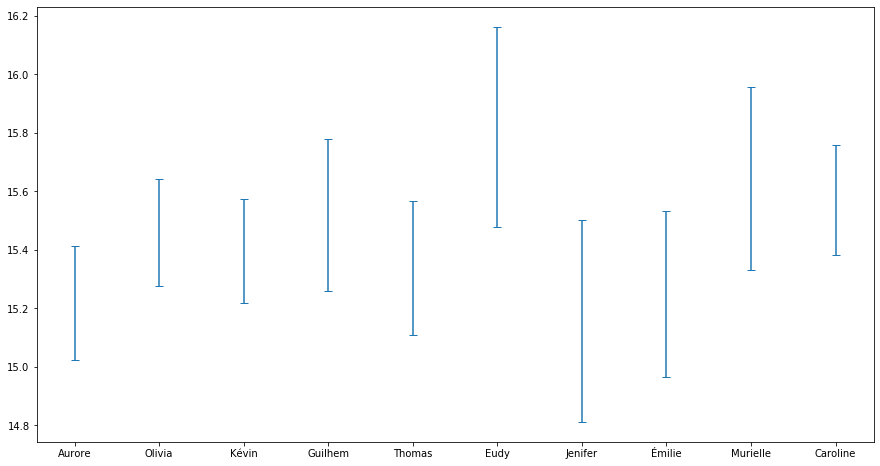

In [15]:
#Représentation graphique des résultats
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(1, 1,hspace=0.25)

xs = np.arange(len(students))
ax1 = fig.add_subplot(gs[0,0])

ax1.errorbar(xs, Vr[:,9], yerr=Vr[:,15], xerr=None,ls='',capsize=4)
ax1.set_xticks(xs)
ax1.set_xticklabels(students)
plt.show()